1. Descripción del problema:
Investiga sobre de que se tratan los modelos de regresión y de clasificación en el
aprendizaje de máquinas, luego define claramente el problema que quieres resolver.
Explica brevemente el objetivo del modelo, ya sea de regresión (predecir un valor
numérico) o clasificación (clasificar entre diferentes categorías).

En este caso, el objetivo es predecir cuanto ganara una pelicula en taquilla en base a 
diferentes características como el género, el presupuesto, el director, etc.
Por lo tanto, se trata de un problema de regresión, ya que el valor a predecir es numérico.

2. Fuente de datos:
• Investiga y selecciona una fuente de datos adecuada que puedas usar para tu modelo de machine learning. La fuente de datos puede ser un archivo CSV, una base de datos pública, o una API que proporcione acceso a los datos relevantes.
• Incluye una descripción detallada de la fuente: ¿de dónde provienen los datos? ¿Son datos abiertos o de una plataforma específica?
• Proporciona el enlace o el proceso necesario para obtener el conjunto de datos.

* La fuente de datos "Movies Daily Update Dataset" es un archivo CSV que contiene información sobre películas y series de televisión.
* La base de datos proviene del TMBD (The Movie Database), que es una base de datos de películas y series de television actualizada por la comunidad. Esta es open source (publica) y se puede acceder de distintas maneras, en mi caso la descargue de kaggle (ya que se actualiza diariamente).
* La base de datos: https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies/data


3. Descripción de las características:
Detalla las características o variables que estarán disponibles en los datos. Describe
brevemente cada una y explica por qué es relevante para el problema que estás intentando
resolver.
Menciona si las características son numéricas, categóricas o de otro tipo. Esto será clave
para saber cómo se utilizarán más adelante en el modelo.
Nota: en un conjunto de datos de casas, las características podrían ser: "tamaño", "número de
habitaciones", "ubicación", etc.

4. Creación del DataFrame:
• Usa el código necesario para extraer los datos de la fuente y mostrar la estructura
del DataFrame.

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read a zipped csv file
df = pd.read_csv('data/movies.csv.zip')

In [3]:
df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722372,304777,Your Baby Can Read! Starter DVD,NaN,en,Starter DVD in the Your Baby Can Read series,0.001,NaN,1997-01-01,0.0,0.0,0.0,Released,NaN,0.000,0.0,NaN,NaN,/di42tKetXIZvnwNj8B1UWoTaLAb.jpg,NaN,NaN
722373,954250,Dreams Can’t hurt you,NaN,ga,Images and sounds of a vintage movie trailer a...,0.001,NaN,2020-01-01,0.0,0.0,5.0,Released,NaN,0.000,0.0,NaN,NaN,/25zca8ABva4c5XT0vAu2mURdVwM.jpg,/yVur6fksikymrfvvYfuAEFCbsda.jpg,NaN
722374,644809,CZW: Tournament of Death VIII,Action,en,CZW Tournament of Death VIII held on June 6 20...,0.001,Combat Zone Wrestling,2009-06-06,0.0,0.0,132.0,Released,NaN,0.000,0.0,Nicholas W. Wilson-Alexander Bedranowksy-Micha...,ultraviolence-prowrestling-professional wrestling,/uOukm0mvEwOcSeHbDi3WeILVYeM.jpg,NaN,NaN
722375,441621,Pipa the Frog,Animation,ru,About a fantasy frog who imagined herself to b...,0.001,Studio Ekran-RGTRK Ostankino,1992-02-13,0.0,0.0,4.0,Released,NaN,0.000,0.0,Lyudmila Ilyina-Igor Vernik,NaN,/s2FrW1q48yVLzYPbn91sSSPyoph.jpg,NaN,NaN


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722377 entries, 0 to 722376
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722377 non-null  int64  
 1   title                 722371 non-null  object 
 2   genres                511991 non-null  object 
 3   original_language     722377 non-null  object 
 4   overview              604102 non-null  object 
 5   popularity            722377 non-null  float64
 6   production_companies  337344 non-null  object 
 7   release_date          670684 non-null  object 
 8   budget                722377 non-null  float64
 9   revenue               722377 non-null  float64
 10  runtime               688025 non-null  float64
 11  status                722377 non-null  object 
 12  tagline               108410 non-null  object 
 13  vote_average          722377 non-null  float64
 14  vote_count            722377 non-null  float64
 15  

In [5]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')

In [6]:
# numerical columns
print(df.select_dtypes(include=[np.number]).columns.tolist())

# categorical columns
print(df.select_dtypes(include=[object]).columns.tolist())

['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
['title', 'genres', 'original_language', 'overview', 'production_companies', 'release_date', 'status', 'tagline', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations']


In [7]:
# Columns
categorical_columns = ['title', 'genres', 'original_language', 'overview', 'production_companies', 'release_date', 'status', 'tagline', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations']
numerical_columns = ['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']


In [8]:
# To use columns
categorical_columns_yes = ['genres', 'original_language', 'production_companies', 'release_date', 'credits']
numerical_columns_yes = ['budget', 'runtime']
target = 'revenue'

# Drop columns      
df = df[categorical_columns_yes + numerical_columns_yes + [target]]

In [9]:

# Set columns with correct data types
df[categorical_columns_yes] = df[categorical_columns_yes].astype('category')
df[numerical_columns_yes] = df[numerical_columns_yes].astype('float')
df[target] = df[target].astype('float')

# Check data types
df.dtypes

/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/801719563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns_yes] = df[categorical_columns_yes].astype('category')
/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/801719563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns_yes] = df[numerical_columns_yes].astype('float')
/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/801719563.py:4: SettingWithCopyWarning: 
A val

genres                  category
original_language       category
production_companies    category
release_date            category
credits                 category
budget                   float64
runtime                  float64
revenue                  float64
dtype: object

In [10]:
df.original_language.value_counts()

original_language
en    379022
fr     44801
es     42386
de     37072
ja     27679
       ...  
om         1
ts         1
tn         1
ty         1
za         1
Name: count, Length: 167, dtype: int64

Text(0.5, 1.0, 'Top 10 Most Common Languages')

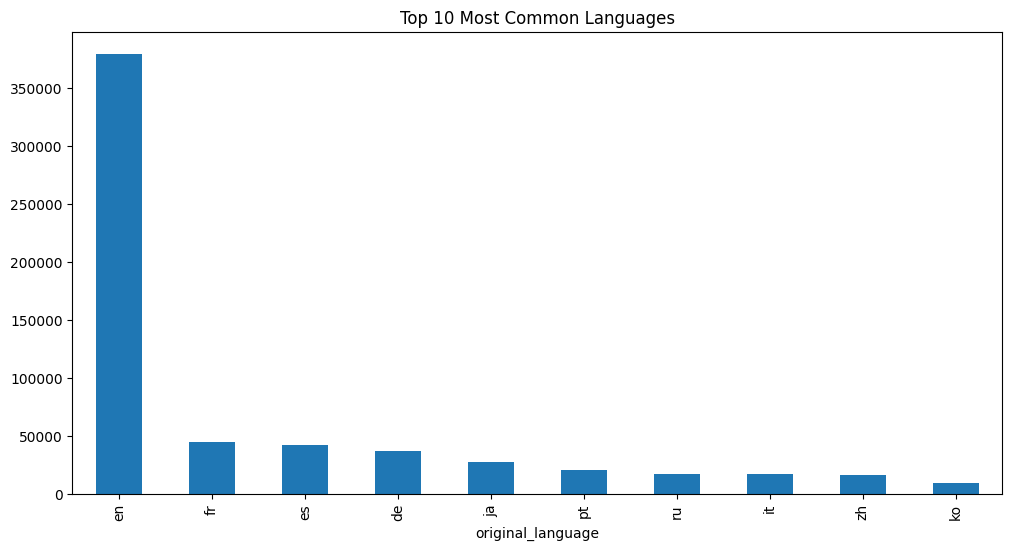

In [11]:
# histogram of the original_language column. Only show the 10 most common languages.
df['original_language'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Common Languages')


Text(0, 0.5, 'Revenue')

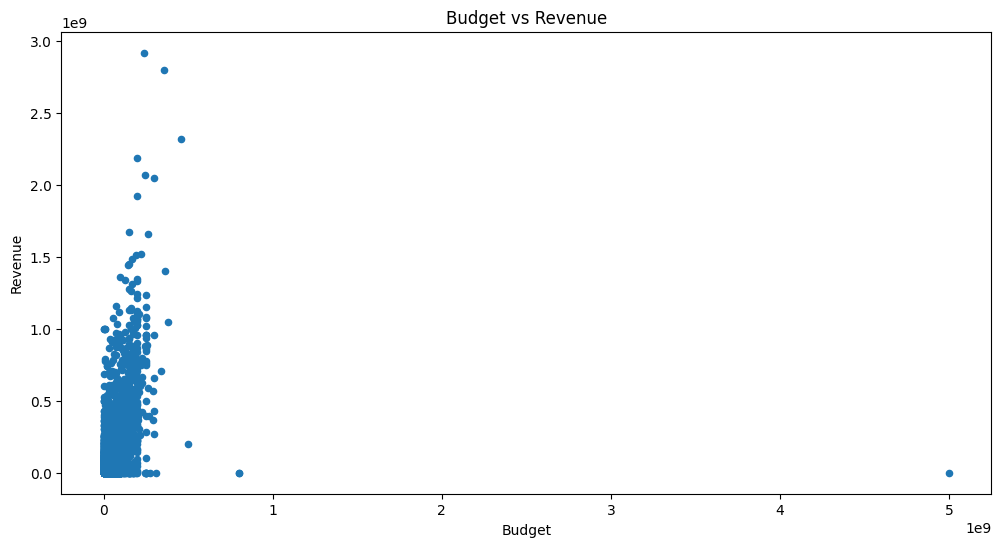

In [12]:
# scatter plot of budget vs revenue
df.plot(kind='scatter', x='budget', y='revenue', figsize=(12, 6))
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')



Text(0, 0.5, 'Count')

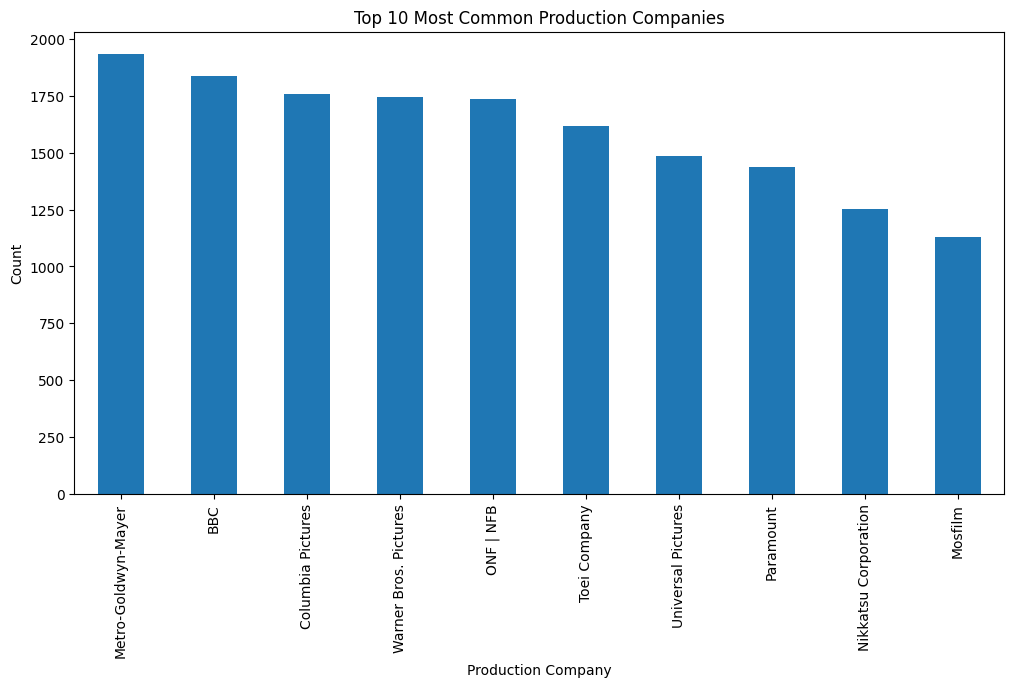

In [13]:
# plot the 10 most common production companies
df['production_companies'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Common Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

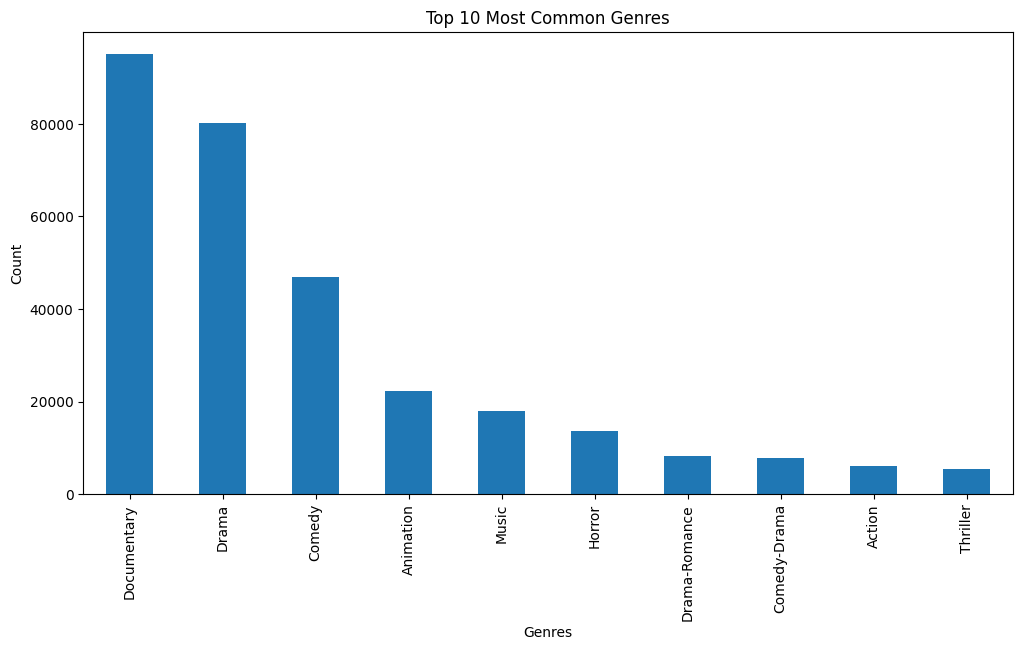

In [14]:
# Show the most common genres
df['genres'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')


In [15]:
# Only use the yes columns
df = df[categorical_columns_yes + numerical_columns_yes + [target]]


In [16]:
# Check for missing values
df.isnull().sum()


genres                  210386
original_language            0
production_companies    385033
release_date             51693
credits                 224776
budget                       0
runtime                  34352
revenue                      0
dtype: int64

In [17]:
# number of rows 
print("Number of rows:", df.shape[0])

Number of rows: 722377


In [18]:
# Preprocessing


# Change the release_date column to datetime type and only keep the year
df['release_date'] = pd.to_datetime(df['release_date']).dt.year



In [19]:
# Count values de release_date column
df['release_date'].value_counts().head(20)

release_date
2019.0    36156
2020.0    35291
2018.0    32889
2021.0    32440
2017.0    29865
2016.0    26363
2015.0    25177
2014.0    23629
2013.0    21413
2012.0    17745
2011.0    14800
2010.0    13551
2009.0    12804
2008.0    12028
2022.0    11780
2007.0    11700
2006.0    11511
2005.0    10647
2004.0     9568
2003.0     8809
Name: count, dtype: int64

In [20]:
# delte movies with release date after 2025
df = df[df['release_date'] <= 2025]


In [21]:
# get min and max release dates
min_release_date = df['release_date'].min()
max_release_date = df['release_date'].max()
print("Min release date:", min_release_date)
print("Max release date:", max_release_date)

bins = [x for x in range(1870, 2031, 10)]

# bin the release dates into decades
df['release_decade'] = pd.cut(df['release_date'], bins=bins, labels=[f'{x}s' for x in range(1870, 2030, 10)], right=False)

# plot the number of movies released in each decade
df['release_decade'].value_counts()


Min release date: 1874.0
Max release date: 2025.0


release_decade
2010s    241588
2000s     98274
2020s     81503
1990s     54311
1980s     45350
1970s     39525
1960s     30434
1950s     20729
1930s     16438
1940s     14955
1920s     12097
1910s     10446
1900s      3074
1890s      1892
1880s        40
1870s        22
Name: count, dtype: int64

Text(0, 0.5, 'Revenue')

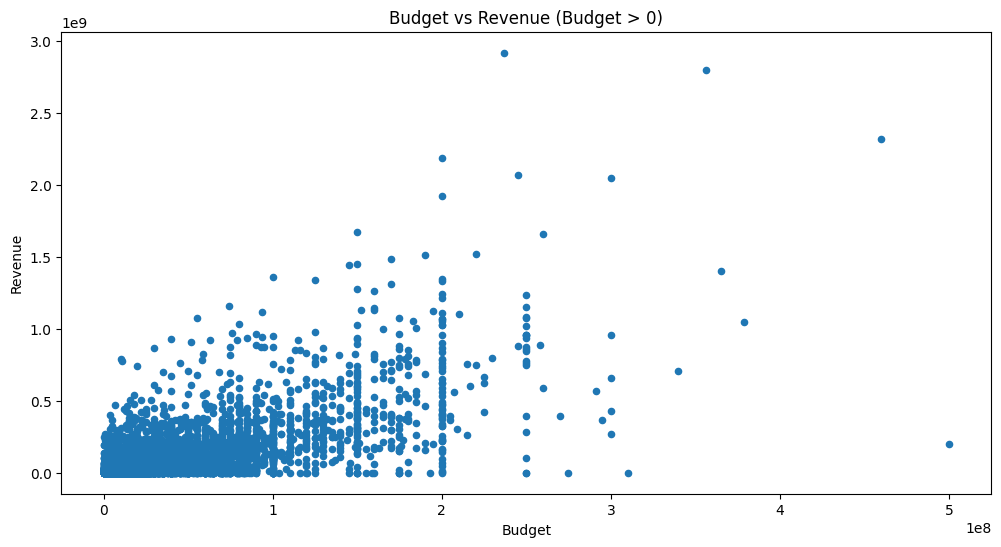

In [22]:
# correlation between budget and revenue for all budget values greater than 0
df[df['budget'] > 0].plot(kind='scatter', x='budget', y='revenue', figsize=(12, 6))
plt.title('Budget vs Revenue (Budget > 0)')
plt.xlabel('Budget')
plt.ylabel('Revenue')


In [23]:
# print random sample of budgets    
print(df['budget'].sample(10))

90573           0.0
279425          0.0
658229          0.0
519993          0.0
622665          0.0
211188          0.0
675013          0.0
14299     5115000.0
317493          0.0
211416          0.0
Name: budget, dtype: float64


In [24]:
# Group the budget column in bins of 100 thousand dollars and a last bin for budgets over 1 million dollars
df['budget_new'] = pd.cut(df['budget'], bins=[x for x in range(0, 100000001, 10000000)] + [np.inf], labels=[f'${x/1000000:.0f}M - ${x/1000000 + 10:.0f}M' for x in range(0, 100000000, 10000000)] + ['> $100M'])
df['budget_new']

0             > $100M
1             > $100M
2         $10M - $20M
3             > $100M
4             > $100M
             ...     
722372            NaN
722373            NaN
722374            NaN
722375            NaN
722376            NaN
Name: budget_new, Length: 670678, dtype: category
Categories (11, object): ['$0M - $10M' < '$10M - $20M' < '$20M - $30M' < '$30M - $40M' ... '$70M - $80M' < '$80M - $90M' < '$90M - $100M' < '> $100M']

In [25]:
# print budget new value counts
print(df['budget_new'].value_counts())

budget_new
$0M - $10M      28500
$10M - $20M      2046
$20M - $30M      1080
$30M - $40M       653
> $100M           476
$40M - $50M       380
$50M - $60M       269
$60M - $70M       212
$70M - $80M       193
$80M - $90M       127
$90M - $100M      115
Name: count, dtype: int64


In [26]:
df

,genres,original_language,production_companies,release_date,credits,budget,runtime,revenue,release_decade,budget_new
0,Science Fiction-Action-Adventure,en,Legendary Pictures-Warner Bros. Pictures,2024.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,150000000.0,115.0,558503759.0,2020s,> $100M
1,Action-Science Fiction-Horror,en,Apelles Entertainment-Warner Bros. Pictures-di...,2023.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,129000000.0,116.0,352056482.0,2020s,> $100M
2,Horror-Mystery-Thriller,en,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,18000000.0,103.0,65675816.0,2020s,$10M - $20M
3,Action-Adventure-Science Fiction,en,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,200000000.0,127.0,407045464.0,2020s,> $100M
4,Science Fiction-Adventure,en,Legendary Pictures,2024.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,190000000.0,167.0,683813734.0,2020s,> $100M
...,...,...,...,...,...,...,...,...,...,...
722372,NaN,en,NaN,1997.0,NaN,0.0,0.0,0.0,1990s,NaN
722373,NaN,ga,NaN,2020.0,NaN,0.0,5.0,0.0,2020s,NaN
722374,Action,en,Combat Zone Wrestling,2009.0,Nicholas W. Wilson-Alexander Bedranowksy-Micha...,0.0,132.0,0.0,2000s,NaN
722375,Animation,ru,Studio Ekran-RGTRK Ostankino,1992.0,Lyudmila Ilyina-Igor Vernik,0.0,4.0,0.0,1990s,NaN


In [27]:
# remove rows with NaN values
df = df.dropna()

In [28]:
df

,genres,original_language,production_companies,release_date,credits,budget,runtime,revenue,release_decade,budget_new
0,Science Fiction-Action-Adventure,en,Legendary Pictures-Warner Bros. Pictures,2024.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,150000000.0,115.0,558503759.0,2020s,> $100M
1,Action-Science Fiction-Horror,en,Apelles Entertainment-Warner Bros. Pictures-di...,2023.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,129000000.0,116.0,352056482.0,2020s,> $100M
2,Horror-Mystery-Thriller,en,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,18000000.0,103.0,65675816.0,2020s,$10M - $20M
3,Action-Adventure-Science Fiction,en,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,200000000.0,127.0,407045464.0,2020s,> $100M
4,Science Fiction-Adventure,en,Legendary Pictures,2024.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,190000000.0,167.0,683813734.0,2020s,> $100M
...,...,...,...,...,...,...,...,...,...,...
722279,Documentary-Music,en,Kayane Productions,2007.0,Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...,50.0,80.0,0.0,2000s,$0M - $10M
722287,Comedy,es,IES Pino Manso-SHAC80 Film Company,2021.0,Lara Pousa-Óscar Iglesias-Estela Diz-Martín R....,10.0,4.0,0.0,2020s,$0M - $10M
722292,Documentary-History,es,IES Pino Manso-SHAC80 Film Company,2021.0,Miguel Gómez Rivada-Andrés Campos-Martín R. Ca...,10.0,2.0,5.0,2020s,$0M - $10M
722336,Documentary-TV Movie,en,Metrotone Media-Abacus Media Rights-ZDF,2021.0,Charles Kriel-Mia Bloom-Kyle Taylor-Judith A. ...,520000.0,91.0,0.0,2020s,$0M - $10M


In [29]:
df['production_companies'].str.split('-')

0               [Legendary Pictures, Warner Bros. Pictures]
1         [Apelles Entertainment, Warner Bros. Pictures,...
2         [Screen Gems, 2.0 Entertainment, Jesus & Mary,...
3         [Skydance, Paramount, di Bonaventura Pictures,...
4                                      [Legendary Pictures]
                                ...                        
722279                                 [Kayane Productions]
722287                [IES Pino Manso, SHAC80 Film Company]
722292                [IES Pino Manso, SHAC80 Film Company]
722336          [Metrotone Media, Abacus Media Rights, ZDF]
722338    [RUGA Film, Collettivo L'Ambulante, Cineteca S...
Name: production_companies, Length: 24314, dtype: object

In [30]:
# genres are written like "A-B-C-D" so we can split them by "-". Split the genres column by "-" and replace woth lists of sorted genres
df['genres'] = df['genres'].str.split('-')

# the same to production companies
df['production_companies'] = df['production_companies'].str.split('-')

df





/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/1841004062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.split('-')
/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/1841004062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_companies'] = df['production_companies'].str.split('-')


,genres,original_language,production_companies,release_date,credits,budget,runtime,revenue,release_decade,budget_new
0,"[Science Fiction, Action, Adventure]",en,"[Legendary Pictures, Warner Bros. Pictures]",2024.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,150000000.0,115.0,558503759.0,2020s,> $100M
1,"[Action, Science Fiction, Horror]",en,"[Apelles Entertainment, Warner Bros. Pictures,...",2023.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,129000000.0,116.0,352056482.0,2020s,> $100M
2,"[Horror, Mystery, Thriller]",en,"[Screen Gems, 2.0 Entertainment, Jesus & Mary,...",2023.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,18000000.0,103.0,65675816.0,2020s,$10M - $20M
3,"[Action, Adventure, Science Fiction]",en,"[Skydance, Paramount, di Bonaventura Pictures,...",2023.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,200000000.0,127.0,407045464.0,2020s,> $100M
4,"[Science Fiction, Adventure]",en,[Legendary Pictures],2024.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,190000000.0,167.0,683813734.0,2020s,> $100M
...,...,...,...,...,...,...,...,...,...,...
722279,"[Documentary, Music]",en,[Kayane Productions],2007.0,Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...,50.0,80.0,0.0,2000s,$0M - $10M
722287,[Comedy],es,"[IES Pino Manso, SHAC80 Film Company]",2021.0,Lara Pousa-Óscar Iglesias-Estela Diz-Martín R....,10.0,4.0,0.0,2020s,$0M - $10M
722292,"[Documentary, History]",es,"[IES Pino Manso, SHAC80 Film Company]",2021.0,Miguel Gómez Rivada-Andrés Campos-Martín R. Ca...,10.0,2.0,5.0,2020s,$0M - $10M
722336,"[Documentary, TV Movie]",en,"[Metrotone Media, Abacus Media Rights, ZDF]",2021.0,Charles Kriel-Mia Bloom-Kyle Taylor-Judith A. ...,520000.0,91.0,0.0,2020s,$0M - $10M


In [31]:
# df['production_companies'] = df['production_companies'].str.split('-')

# production companies uniue values
prod_companies = set()
for companies in df['production_companies']:
    # skip if companioes is NaN a.any() or a.all()
    if not type(companies) == list and not companies:   
        continue
    for company in companies:
        prod_companies.add(company)
print("Number of unique production companies:", len(prod_companies))
print("Unique production companies:", prod_companies)

# To define if a prod company is famous we need to know if they have at least 1 film with a revenue over the avarage revenue of all films



# create a set of famous production companies
famous_prod_companies = set(df[df['revenue'] > df['revenue'].mean()]['production_companies'].explode().unique())
print("Number of famous production companies:", len(famous_prod_companies))

# Export this companies to a file
with open('famous_prod_companies.txt', 'w') as f:
    for company in famous_prod_companies:
        f.write(company + '\n')
        
# Also export all the production companies to a file
with open('all_prod_companies.txt', 'w') as f:
    for company in prod_companies:
        f.write(company + '\n')

Number of unique production companies: 22717
Unique production companies: {'Dexter Studios', 'Green Publicidad y Medios', 'Happy Hour Productions', 'Filmquest Pictures', 'Stratus Film Co.', 'Veiled Hand Productions', 'Centerstage Productions', 'Ryan Productions', 'Art Schnyder', 'GGR', 'Ringling College Studio Labs', 'Liquid Picnic Productions', 'Paris Entretenimento', 'Moot Point (Dragged) Productions', 'Pinnacle Peak Pictures', 'Shifting Gears Entertainment', 'Nonstop show group', 'SPI International Polska', 'Mandrill Films', 'October Animation Studio', 'Sayanfilm', 'Riff Raff Film Productions', 'Rejaputhra Films', 'Animus Entertainment Group', 'Kovac Industries', 'NYC School of Visual Arts', 'Adagio Films', 'Mongol Film Group Los Angeles', 'Doug Orchard Films', 'Shoestring Pictures', 'Equity Pictures Medienfonds GmbH & Co. KG III', 'Producciones Copelar', 'The Peoples Network', 'Cinema Service', 'Haunted Movies', 'Will Packer Productions', 'Slough Pond', 'Les écuries productions', '

In [32]:
# df['credits'] = df['credits'].str.split('-')

# Lets get the number of total uniques credits
credits = set()
for credit in df['credits']:
    # skip if credit is NaN
    if not type(credit) == list and not credit:   
        continue
    # print(credit)
    for c in credit:
        credits.add(c)
print("Number of unique credits:", len(credits))
print("Unique credits:", credits)

# To define if a credit is famous we need to know if they have at least 1 film with a revenue over the avarage revenue of all films
# create a set of famous credits
famous_credits = set(df[df['revenue'] > df['revenue'].mean()]['credits'].explode().unique())
print("Number of famous credits:", len(famous_credits))
print("Famous credits:", famous_credits)
# Export this credits to a file
with open('famous_credits.txt', 'w') as f:
    for credit in famous_credits:
        f.write(credit + '\n')

# also export all credits to a file
with open('all_credits.txt', 'w') as f:
    for credit in credits:
        f.write(credit + '\n') 

Number of unique credits: 425
Unique credits: {'č', 'х', 'ด', 'a', 'l', "'", 'г', 'T', '́', '忆', 'I', '郝', 'Đ', 'ã', 'ọ', 'ū', '_', '0', 'і', 'þ', 'ī', 'ộ', 'א', 'ả', 'Е', 'æ', '偉', 'ď', 'F', '/', 'ą', 'W', 'ķ', 'Î', 'N', 'ν', 'ค', 'ř', '光', 'Ť', 'Ž', 'Ш', 'Â', '์', 'Ğ', '̈', '刘', '劉', '滕', '蔡', 'ß', '王', '윤', '4', 'ц', 'ณ', '亮', 'ấ', '2', 'Ř', '学', 'î', 'ن', 'ố', 'Ç', '北', 'ú', 'ự', '‑', 'З', 'A', '安', '’', '熹', '恩', 'â', 'ă', 'λ', '(', 'ž', 'ứ', 'e', 'ä', 'é', 'ţ', 'ş', 'ห', 'M', 'İ', 'k', 'ə', 'І', 'ο', 'ศ', '之', '“', 'ữ', 'ł', 'i', 'ạ', 'n', 'v', 'У', 'è', 'ö', '广', 'ü', 'В', 'ë', 'у', 'đ', 'ệ', '庐', 'ج', '3', 'g', 'ж', 'ế', 'ắ', 'ậ', 'ễ', 'd', '倪', 'ỳ', 'á', 'מ', '文', 'ά', 'Б', 'ę', 'ủ', 'า', '晓', 'Š', 'ń', '边', 'ו', 'f', 'Ķ', 'ầ', 'Д', 'Č', '戴', 'и', 'Ж', 'ũ', 'ק', 'ő', '張', '.', 'о', 'Ï', 'Ú', '高', '郭', 'P', 'ğ', 'Ä', 'o', 'к', 'Х', 'Ê', 'ח', 'p', 'ז', 'ű', 'Ф', '!', 'ề', 'Ю', 'И', 'È', 'à', 'ù', 'т', 'ï', 'ư', 'ท', '喆', 'σ', 'D', 'м', 'V', ')', 'έ', 'í', 'Ν', 'ș', 'Ģ', 'ص', 'ê'

In [34]:
# lets do the same but with cast
# cast is written like "A-B-C-D" so we can split them by "-". Split the cast column by "-" and replace woth lists of sorted cast
new = df['credits'].str.split('-')
# create a set of famous cast members
famous_cast = set(df[df['revenue'] > df['revenue'].mean()]['credits'].explode().unique())
print("Number of famous cast members:", len(famous_cast))
# Export this cast members to a file
with open('famous_cast.txt', 'w') as f:
    for cast_member in famous_cast:
        f.write(cast_member + '\n')


Number of famous cast members: 3735


In [35]:
# count values of revenue
df['revenue'].value_counts()

revenue
0.0            14374
1.0               74
100.0             72
100000.0          60
2000000.0         44
               ...  
213400000.0        1
4880.0             1
83051.0            1
2617.0             1
12397.0            1
Name: count, Length: 8025, dtype: int64

In [36]:
# genres uniques
genres = set()
for row in df['genres']:
    genres.update(row)
genres = sorted(genres)
print(genres)
print(len(genres))

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
19


In [37]:
df.drop(columns=['release_date', 'budget'], inplace=True)


/var/folders/wb/bn0jrt3d3zd8ry22331br73njdfm27/T/ipykernel_52570/3198186237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['release_date', 'budget'], inplace=True)


In [38]:
df

,genres,original_language,production_companies,credits,runtime,revenue,release_decade,budget_new
0,"[Science Fiction, Action, Adventure]",en,"[Legendary Pictures, Warner Bros. Pictures]",Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,115.0,558503759.0,2020s,> $100M
1,"[Action, Science Fiction, Horror]",en,"[Apelles Entertainment, Warner Bros. Pictures,...",Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,116.0,352056482.0,2020s,> $100M
2,"[Horror, Mystery, Thriller]",en,"[Screen Gems, 2.0 Entertainment, Jesus & Mary,...",Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,103.0,65675816.0,2020s,$10M - $20M
3,"[Action, Adventure, Science Fiction]",en,"[Skydance, Paramount, di Bonaventura Pictures,...",Anthony Ramos-Dominique Fishback-Luna Lauren V...,127.0,407045464.0,2020s,> $100M
4,"[Science Fiction, Adventure]",en,[Legendary Pictures],Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,167.0,683813734.0,2020s,> $100M
...,...,...,...,...,...,...,...,...
722279,"[Documentary, Music]",en,[Kayane Productions],Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...,80.0,0.0,2000s,$0M - $10M
722287,[Comedy],es,"[IES Pino Manso, SHAC80 Film Company]",Lara Pousa-Óscar Iglesias-Estela Diz-Martín R....,4.0,0.0,2020s,$0M - $10M
722292,"[Documentary, History]",es,"[IES Pino Manso, SHAC80 Film Company]",Miguel Gómez Rivada-Andrés Campos-Martín R. Ca...,2.0,5.0,2020s,$0M - $10M
722336,"[Documentary, TV Movie]",en,"[Metrotone Media, Abacus Media Rights, ZDF]",Charles Kriel-Mia Bloom-Kyle Taylor-Judith A. ...,91.0,0.0,2020s,$0M - $10M


In [39]:
# erase movies with revenue over 1 billion dollars
df = df[df['revenue'] <= 1000000000]

# drop movies with revenue of 0 dollars
df = df[df['revenue'] > 0]



In [40]:
# print revenue in bins of 100 million dollars
df['revenue_res'] = pd.cut(df['revenue'], bins=[x for x in range(0, 100000001, 10000000)] + [np.inf], labels=[f'${x/1000000:.0f}M - ${x/1000000 + 10:.0f}M' for x in range(0, 100000000, 10000000)] + ['> $100M'])

df['revenue_res'].value_counts()


revenue_res
$0M - $10M      4586
> $100M         1663
$10M - $20M     1120
$20M - $30M      651
$30M - $40M      474
$40M - $50M      375
$50M - $60M      266
$60M - $70M      244
$70M - $80M      201
$80M - $90M      156
$90M - $100M     154
Name: count, dtype: int64

In [41]:
df.drop(columns=['revenue'], inplace=True)
df

,genres,original_language,production_companies,credits,runtime,release_decade,budget_new,revenue_res
0,"[Science Fiction, Action, Adventure]",en,"[Legendary Pictures, Warner Bros. Pictures]",Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,115.0,2020s,> $100M,> $100M
1,"[Action, Science Fiction, Horror]",en,"[Apelles Entertainment, Warner Bros. Pictures,...",Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,116.0,2020s,> $100M,> $100M
2,"[Horror, Mystery, Thriller]",en,"[Screen Gems, 2.0 Entertainment, Jesus & Mary,...",Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,103.0,2020s,$10M - $20M,$60M - $70M
3,"[Action, Adventure, Science Fiction]",en,"[Skydance, Paramount, di Bonaventura Pictures,...",Anthony Ramos-Dominique Fishback-Luna Lauren V...,127.0,2020s,> $100M,> $100M
4,"[Science Fiction, Adventure]",en,[Legendary Pictures],Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,167.0,2020s,> $100M,> $100M
...,...,...,...,...,...,...,...,...
719076,"[Documentary, Crime]",en,[U.S. Department of Homeland Security],Connor Patrick Griffin-Kristina Anderson-Dave ...,90.0,2010s,$0M - $10M,$0M - $10M
720879,[Comedy],fa,[Pouya Film],Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,90.0,2010s,$0M - $10M,$0M - $10M
721661,"[Drama, Crime]",fa,[sooreh co],Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,90.0,2010s,$0M - $10M,$0M - $10M
721705,[Drama],fa,[Iranian Independents],Baran Kosari-Reza Behboudi-Bahar Katouzi,93.0,2010s,$0M - $10M,$0M - $10M


In [42]:
# rename
df.rename(columns={'revenue_res': 'revenue'}, inplace=True)
df.rename(columns={'budget_new': 'budget'}, inplace=True)
df.rename(columns={'release_decade': 'release_date'}, inplace=True)

df

,genres,original_language,production_companies,credits,runtime,release_date,budget,revenue
0,"[Science Fiction, Action, Adventure]",en,"[Legendary Pictures, Warner Bros. Pictures]",Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,115.0,2020s,> $100M,> $100M
1,"[Action, Science Fiction, Horror]",en,"[Apelles Entertainment, Warner Bros. Pictures,...",Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,116.0,2020s,> $100M,> $100M
2,"[Horror, Mystery, Thriller]",en,"[Screen Gems, 2.0 Entertainment, Jesus & Mary,...",Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,103.0,2020s,$10M - $20M,$60M - $70M
3,"[Action, Adventure, Science Fiction]",en,"[Skydance, Paramount, di Bonaventura Pictures,...",Anthony Ramos-Dominique Fishback-Luna Lauren V...,127.0,2020s,> $100M,> $100M
4,"[Science Fiction, Adventure]",en,[Legendary Pictures],Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,167.0,2020s,> $100M,> $100M
...,...,...,...,...,...,...,...,...
719076,"[Documentary, Crime]",en,[U.S. Department of Homeland Security],Connor Patrick Griffin-Kristina Anderson-Dave ...,90.0,2010s,$0M - $10M,$0M - $10M
720879,[Comedy],fa,[Pouya Film],Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,90.0,2010s,$0M - $10M,$0M - $10M
721661,"[Drama, Crime]",fa,[sooreh co],Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,90.0,2010s,$0M - $10M,$0M - $10M
721705,[Drama],fa,[Iranian Independents],Baran Kosari-Reza Behboudi-Bahar Katouzi,93.0,2010s,$0M - $10M,$0M - $10M


In [43]:
# export the df to a csv file
df.to_csv('movies_clean.csv', index=False)